<a href="https://colab.research.google.com/github/Craig-UK/artificial-intelligence/blob/main/StockPreBasedOffModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import pandas as pd
import datetime as dt
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as web

start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()

data = web.get_data_yahoo("ATVI", start, end)

data.to_csv("stock_data.csv")

[*********************100%***********************]  1 of 1 completed


In [117]:
data = pd.read_csv("stock_data.csv")

In [118]:
data = data[["Date", "Close"]]

In [119]:
data

,Date,Close
0,2020-01-02,58.650002
1,2020-01-03,58.669998
2,2020-01-06,59.740002
3,2020-01-07,60.340000
4,2020-01-08,59.880001
...,...,...
812,2023-03-24,84.389999
813,2023-03-27,84.330002
814,2023-03-28,84.349998
815,2023-03-29,84.540001


In [120]:
data.columns = ["ds", "y"]

In [121]:
data

,ds,y
0,2020-01-02,58.650002
1,2020-01-03,58.669998
2,2020-01-06,59.740002
3,2020-01-07,60.340000
4,2020-01-08,59.880001
...,...,...
812,2023-03-24,84.389999
813,2023-03-27,84.330002
814,2023-03-28,84.349998
815,2023-03-29,84.540001


In [122]:
from prophet import Prophet

In [123]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqjgsgay_/q9lk04hi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqjgsgay_/z3nhdy0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70714', 'data', 'file=/tmp/tmpqjgsgay_/q9lk04hi.json', 'init=/tmp/tmpqjgsgay_/z3nhdy0k.json', 'output', 'file=/tmp/tmpqjgsgay_/prophet_modelusq8mrk6/prophet_model-20230330161401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:14:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:14:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [124]:
future_dates = prophet.make_future_dataframe(periods=30)
predictions = prophet.predict(future_dates)

In [125]:
from prophet.plot import plot_plotly

plot_plotly(prophet, predictions)

In [126]:
pred_month = predictions["yhat"][-30:]

In [143]:
old_arr = []
full_arr = []
for x in pred_month:
  old_arr.append(x)
old_arr
for x in predictions["yhat"][-60:]:
  full_arr.append(x)
full_arr

[81.67668397163528,
 81.78178305341528,
 81.63739481197051,
 81.43522684777305,
 81.37142432317809,
 81.3219249926255,
 80.80018915300208,
 80.5789019589902,
 80.24357455293413,
 80.05795539792905,
 79.90027630810374,
 79.15655056415811,
 78.90126914287225,
 78.55415035519891,
 78.37975356962546,
 78.25673569069076,
 77.75566545008756,
 77.62470767285447,
 77.4211855960773,
 77.40759272978231,
 77.46016132781202,
 77.54581844729888,
 77.61972565779695,
 77.62001372617848,
 77.8056867935347,
 78.04953929996627,
 78.62902478190493,
 78.83137421168118,
 78.93809703176342,
 79.20644726478737,
 79.50793100263695,
 79.90386493905605,
 80.1048138665275,
 80.10462835259392,
 80.26159564212838,
 80.29904246455195,
 80.47595254798632,
 80.66600378625407,
 80.93308157773676,
 80.9906623514146,
 80.835789674201,
 80.83015734598249,
 80.70063967052076,
 80.70983332693625,
 80.73501748564883,
 80.84359042061791,
 80.75237835977792,
 80.46154064699475,
 80.33558721398744,
 80.10385001747404,
 80.0309

In [144]:
import numpy as np, numpy.random
value = np.random.dirichlet((95, 5), 30).transpose()

value = np.sort(value[0])
same_one = []

for i,x in enumerate(pred_month):
  if i == 0:
    same_one.append(x)
  else:
    same_one.append(x + value[i])
same_one
original_values = full_arr.copy()
full_arr[-30:] = same_one
original_values

[81.67668397163528,
 81.78178305341528,
 81.63739481197051,
 81.43522684777305,
 81.37142432317809,
 81.3219249926255,
 80.80018915300208,
 80.5789019589902,
 80.24357455293413,
 80.05795539792905,
 79.90027630810374,
 79.15655056415811,
 78.90126914287225,
 78.55415035519891,
 78.37975356962546,
 78.25673569069076,
 77.75566545008756,
 77.62470767285447,
 77.4211855960773,
 77.40759272978231,
 77.46016132781202,
 77.54581844729888,
 77.61972565779695,
 77.62001372617848,
 77.8056867935347,
 78.04953929996627,
 78.62902478190493,
 78.83137421168118,
 78.93809703176342,
 79.20644726478737,
 79.50793100263695,
 79.90386493905605,
 80.1048138665275,
 80.10462835259392,
 80.26159564212838,
 80.29904246455195,
 80.47595254798632,
 80.66600378625407,
 80.93308157773676,
 80.9906623514146,
 80.835789674201,
 80.83015734598249,
 80.70063967052076,
 80.70983332693625,
 80.73501748564883,
 80.84359042061791,
 80.75237835977792,
 80.46154064699475,
 80.33558721398744,
 80.10385001747404,
 80.0309

<Axes: >

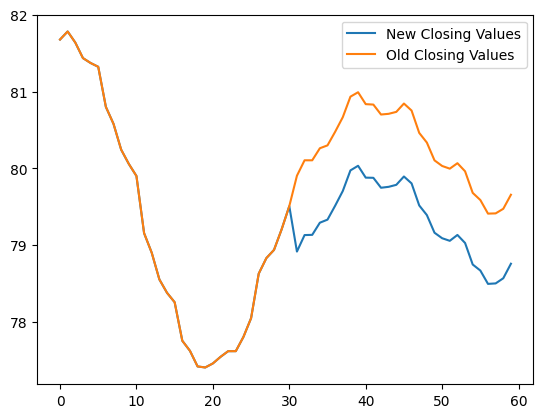

In [145]:
new_preds = pd.DataFrame(full_arr, columns = ["New Closing Values"])
old_preds = pd.DataFrame(original_values, columns = ["Old Closing Values"])
df_merged = pd.concat([new_preds, old_preds], axis=1)
df_merged
df_merged.plot()